# Plot models

In [53]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import glob
import os
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin")

import json
import torch
import pandas as pd
from lib.plot import Visualizations
from lib import utils
from torch.utils.data import DataLoader
from flower.get_dataset import get_dataset, basic_collate_fn
from flower.task import Net
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load global model and data

In [54]:
#############################
# Load Model and Weigths
#############################

weights_file = "../results_centralized_hyperparam/periodic/centralized_training/300_epochs/lr_0.01-batchsize_16_clipping_False_lrdecay_1.0/model.pth"
weights = torch.load(weights_file, weights_only=True)
model = Net()
model.load_state_dict(weights)

#############################
# Load Dataset
#############################
test_dataset_filename = "../data/periodic/periodic_test.pt"
time_steps_filename = "../data/periodic/periodic_time_steps.pt"
time_steps = torch.load(time_steps_filename, weights_only=True)
test_dataset = torch.load(test_dataset_filename, weights_only=True)



<Figure size 640x480 with 0 Axes>

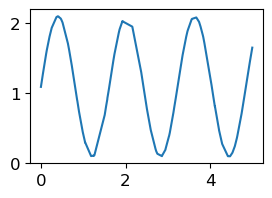

In [55]:
#############################
# Plot one example
#############################
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(3, 2)
x = time_steps.squeeze()
y = test_dataset[0].squeeze()
plt.plot(x, y)
plt.show()


In [ ]:
test_dict

{'observed_data': tensor([[[1.0882],
          [0.0000],
          [1.5613],
          ...,
          [0.0000],
          [0.0000],
          [1.6493]],
 
         [[0.0000],
          [1.2803],
          [1.6044],
          ...,
          [0.0451],
          [0.0489],
          [0.1163]],
 
         [[0.9652],
          [0.0000],
          [0.0000],
          ...,
          [1.5453],
          [0.0000],
          [1.3313]],
 
         ...,
 
         [[0.0000],
          [1.2373],
          [1.5177],
          ...,
          [1.5049],
          [1.5876],
          [0.0000]],
 
         [[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [1.0304]],
 
         [[1.0052],
          [0.0000],
          [1.4023],
          ...,
          [0.5380],
          [0.4686],
          [0.3260]]]),
 'observed_tp': tensor([0.0000, 0.0487, 0.1238, 0.1394, 0.2040, 0.2555, 0.3677, 0.4009, 0.4175,
         0.4379, 0.4626, 0.4692, 0.4772, 0.

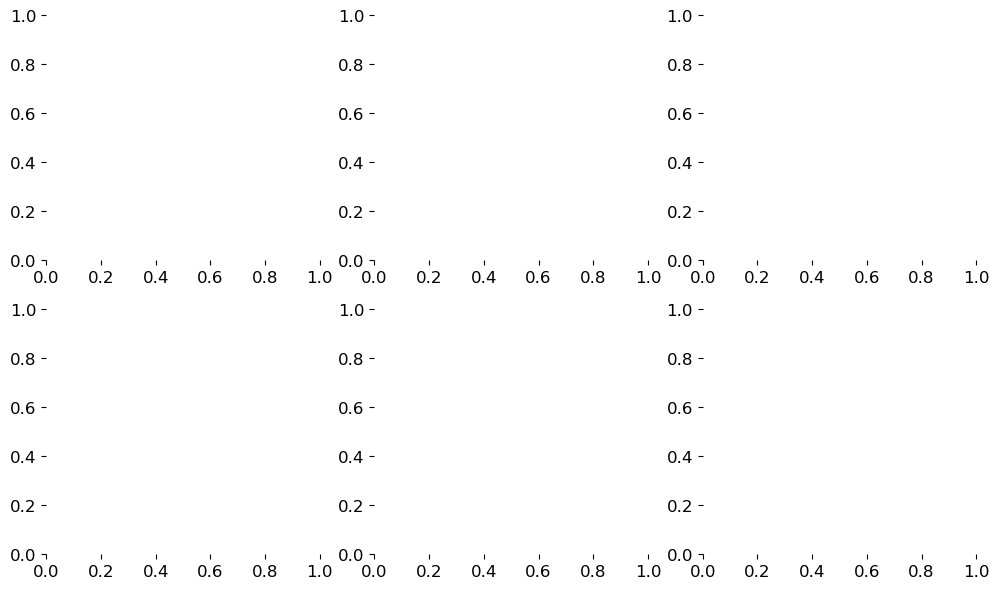

In [57]:
batch_size = 16

dataset_name = "periodic"
sample_tp = 0.5
cut_tp = None
extrap = False
experimentID = 10

testloader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False,
	collate_fn= lambda batch: basic_collate_fn(batch, test_timestamps, dataset_name, sample_tp, cut_tp, extrap, data_type = "test"))
testloader = utils.inf_generator(testloader)
test_dict = utils.get_next_batch(testloader)
viz = Visualizations(device)
with torch.no_grad():
	viz.draw_all_plots_one_dim( test_dict,
								model,
								plot_name = "Test.png",
								experimentID = 11,
								save=False)